In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot/MAML+Arbiter_5way_5shot_inner_loop.csv')
norm_info = pd.read_csv('../MAML+Arbiter_5way_5shot_7096/MAML+Arbiter_5way_5shot_inner_loop.csv')

C:\Users\JM\anaconda3\envs\maml\lib\site-packages\IPython\core\interactiveshell.py:3553: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
norm_info_train= norm_info[norm_info['phase']=='train']
norm_info_val= norm_info[norm_info['phase']=='val']
norm_info_test= norm_info[norm_info['current_iter']=='test']

In [6]:
per_inner_loop_step = norm_info_train.groupby('num_step').mean()
per_inner_loop_step

,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_alpha,layer_dict.conv0.conv.bias_grad_mean,layer_dict.conv0.conv.bias_grad_L1norm,layer_dict.conv0.conv.bias_grad_L2norm,...,layer_dict.linear.weights_weight_L1norm,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_alpha
num_step,,,,,,,,,,,,,,,,,,,,,
0,0.000029,24.121269,1.198605,-0.004450,173.379343,5.937677,0.436677,-1.845315e-11,3.967625e-07,9.527192e-08,...,325.665892,6.046387,77.064694,-1.246885e-09,0.095472,0.051058,-0.01329,0.111540,0.060485,0.010489
1,-0.000984,32.438668,1.674337,-0.004451,173.379425,5.937680,0.440054,2.275220e-10,3.695820e-07,9.015479e-08,...,331.964874,6.092561,76.494207,-3.223913e-10,0.098997,0.052298,-0.01329,0.111627,0.060530,0.010374
2,-0.000728,22.725774,1.116351,-0.004447,173.379256,5.937683,0.440071,2.022868e-10,2.661181e-07,6.641463e-08,...,348.403918,6.303235,76.511486,1.164416e-09,0.075772,0.039743,-0.01329,0.111719,0.060581,0.010249
3,-0.000333,10.430081,0.501281,-0.004444,173.379127,5.937686,0.439344,8.702118e-11,1.275406e-07,3.210868e-08,...,368.636912,6.626950,76.674589,1.166633e-09,0.020599,0.011019,-0.01329,0.111815,0.060631,0.010147
4,-0.000077,3.441068,0.165713,-0.004440,173.379064,5.937689,0.439160,2.305958e-11,4.886888e-08,1.173161e-08,...,390.358165,7.033339,76.873001,-4.419222e-11,0.005433,0.002972,-0.01329,0.111927,0.060689,0.010071


In [7]:
specific_column_values = norm_info_train[norm_info_train['num_step'] == 0]
specific_column_values

,current_iter,phase,num_step,layer_dict.conv0.conv.weight_grad_mean,layer_dict.conv0.conv.weight_grad_L1norm,layer_dict.conv0.conv.weight_grad_L2norm,layer_dict.conv0.conv.weight_weight_mean,layer_dict.conv0.conv.weight_weight_L1norm,layer_dict.conv0.conv.weight_weight_L2norm,layer_dict.conv0.conv.weight_alpha,...,layer_dict.linear.weights_weight_L1norm,layer_dict.linear.weights_weight_L2norm,layer_dict.linear.weights_alpha,layer_dict.linear.bias_grad_mean,layer_dict.linear.bias_grad_L1norm,layer_dict.linear.bias_grad_L2norm,layer_dict.linear.bias_weight_mean,layer_dict.linear.bias_weight_L1norm,layer_dict.linear.bias_weight_L2norm,layer_dict.linear.bias_alpha
0,0,train,0,0.013776,238.842377,10.310259,-0.001755,75.456955,2.396668,0.608534,...,211.514740,3.152209,0.629835,1.490116e-09,0.498336,0.275611,0.000000,0.000000,0.000000,6.489550e-01
5,0,train,0,0.003947,237.155319,10.745304,-0.001755,75.456955,2.396668,0.640136,...,211.514740,3.152209,0.646316,5.960465e-09,0.428868,0.228195,0.000000,0.000000,0.000000,6.568318e-01
10,1,train,0,-0.002911,233.666336,10.257920,-0.001707,75.447662,2.397470,0.646304,...,211.425140,3.150933,0.651530,3.725290e-09,0.170937,0.090050,-0.000200,0.005000,0.002236,6.676338e-01
15,1,train,0,-0.019083,239.298309,9.727441,-0.001707,75.447662,2.397470,0.621851,...,211.425140,3.150933,0.648835,-1.490116e-09,0.276730,0.136270,-0.000200,0.005000,0.002236,6.641659e-01
20,2,train,0,-0.026742,226.853027,9.537435,-0.001708,75.449554,2.398005,0.622206,...,211.250397,3.148469,0.647106,1.192093e-08,0.608028,0.288258,-0.000333,0.007258,0.003312,6.570567e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796975,49997,train,0,0.000427,11.098522,0.530103,-0.005785,242.330948,8.400620,0.768269,...,478.908203,9.251489,123.661728,-7.450581e-10,0.100174,0.055435,-0.028726,0.162514,0.090469,2.166085e-10
796980,49998,train,0,0.005038,12.176069,0.584828,-0.005736,242.340439,8.400753,0.776161,...,478.912903,9.251723,123.653648,-2.980232e-09,0.091541,0.050869,-0.028721,0.162472,0.090461,2.170588e-10
796985,49998,train,0,0.000384,10.040132,0.442883,-0.005736,242.340439,8.400753,0.775531,...,478.912903,9.251723,123.738770,7.450581e-10,0.110199,0.056806,-0.028721,0.162472,0.090461,2.139873e-10
796990,49999,train,0,-0.000073,13.594847,0.616364,-0.005659,242.350052,8.400873,0.783475,...,478.940277,9.252292,123.682465,7.450581e-10,0.095859,0.052010,-0.028720,0.162420,0.090433,2.164734e-10


In [8]:
gr = specific_column_values.groupby('current_iter').mean()

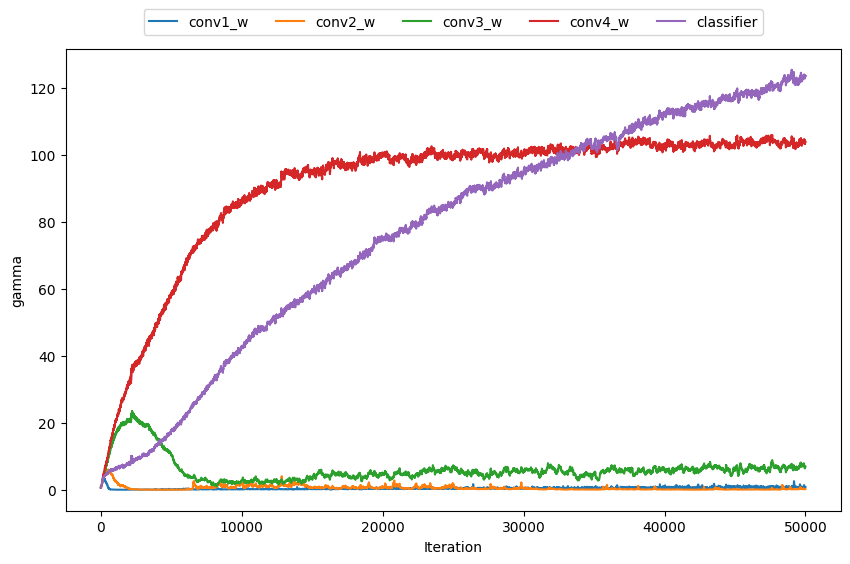

In [9]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = ['layer_dict.conv0.conv.weight_alpha', 
                   'layer_dict.conv1.conv.weight_alpha',
                   'layer_dict.conv2.conv.weight_alpha',
                   'layer_dict.conv3.conv.weight_alpha',
                   'layer_dict.linear.weights_alpha']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('gamma')  


#plt.ylim(0, 100)


plt.show()  # 그래프 보여주기

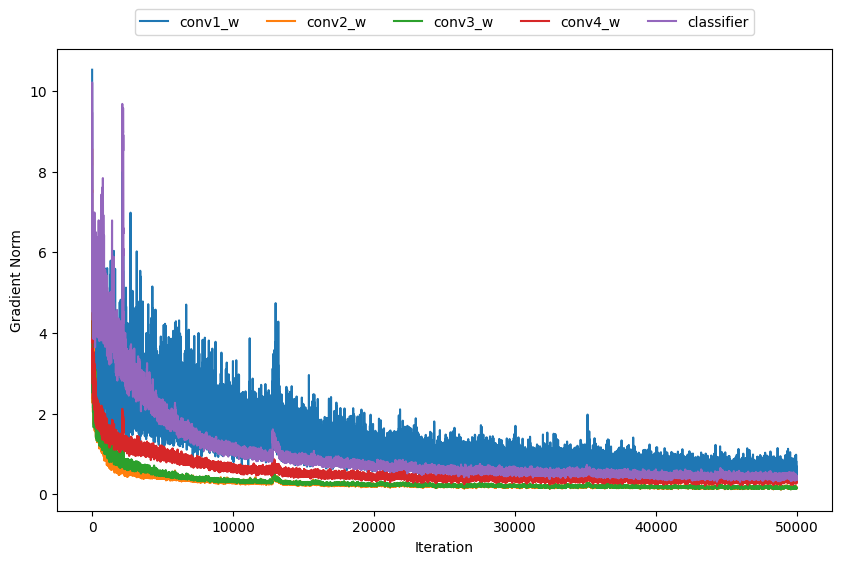

In [17]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_L2norm', 
                    'layer_dict.conv1.conv.weight_grad_L2norm', 
                    'layer_dict.conv2.conv.weight_grad_L2norm',
                    'layer_dict.conv3.conv.weight_grad_L2norm',
                    'layer_dict.linear.weights_grad_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.xlabel('Iteration')  # X 축 라벨 설정
plt.ylabel('Gradient Norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

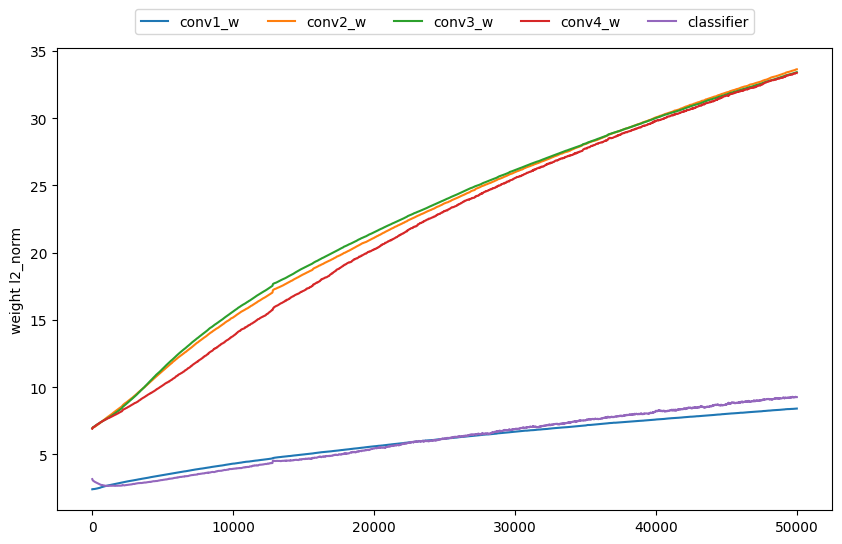

In [11]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_L2norm', 
                    'layer_dict.conv1.conv.weight_weight_L2norm', 
                    'layer_dict.conv2.conv.weight_weight_L2norm',
                    'layer_dict.conv3.conv.weight_weight_L2norm',
                    'layer_dict.linear.weights_weight_L2norm']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('weight l2_norm')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

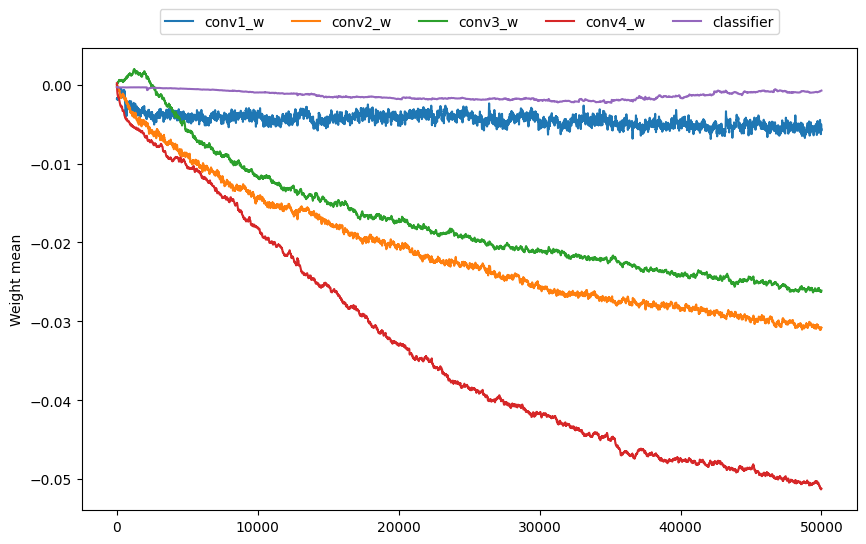

In [15]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_weight_mean', 
                    'layer_dict.conv1.conv.weight_weight_mean', 
                    'layer_dict.conv2.conv.weight_weight_mean',
                    'layer_dict.conv3.conv.weight_weight_mean',
                    'layer_dict.linear.weights_weight_mean']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Weight mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기

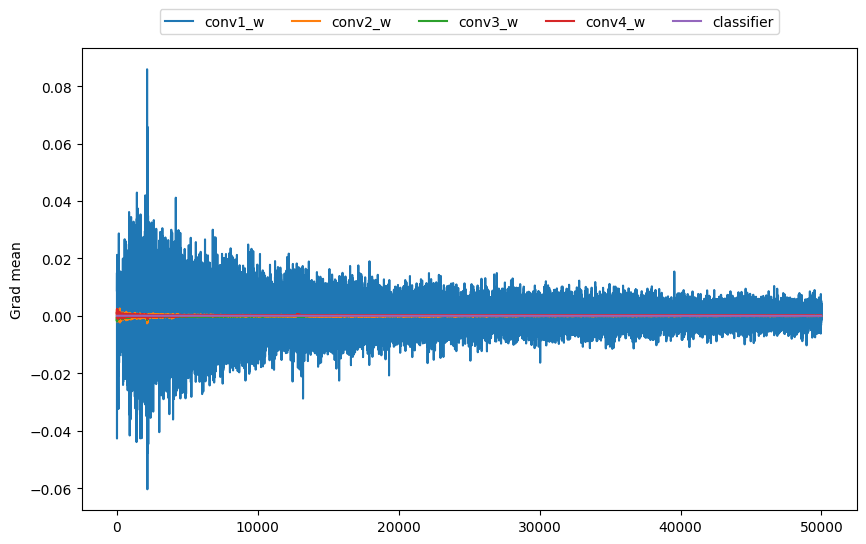

In [20]:
 # 그래프를 그릴 컬럼들의 리스트
columns_to_plot = [ 'layer_dict.conv0.conv.weight_grad_mean', 
                    'layer_dict.conv1.conv.weight_grad_mean', 
                    'layer_dict.conv2.conv.weight_grad_mean',
                    'layer_dict.conv3.conv.weight_grad_mean',
                    'layer_dict.linear.weights_grad_mean']
columns_to_plot_label = ['conv1_w', 'conv2_w', 'conv3_w', 'conv4_w', 'classifier']

# 특정 열(Column)의 값을 그래프로 그리기
plt.figure(figsize=(10, 6))  # 그래프의 크기 설정 

plt.plot(gr[columns_to_plot].values, label=columns_to_plot_label)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=len(columns_to_plot))  # 범례 추가
plt.ylabel('Grad mean')  

# plt.yscale('log')  # Y 축을 로그 스케일로 변경
# plt.ylim(10 ** -5, 10 **2)

plt.show()  # 그래프 보여주기